In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Housing.csv')
data.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [3]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')

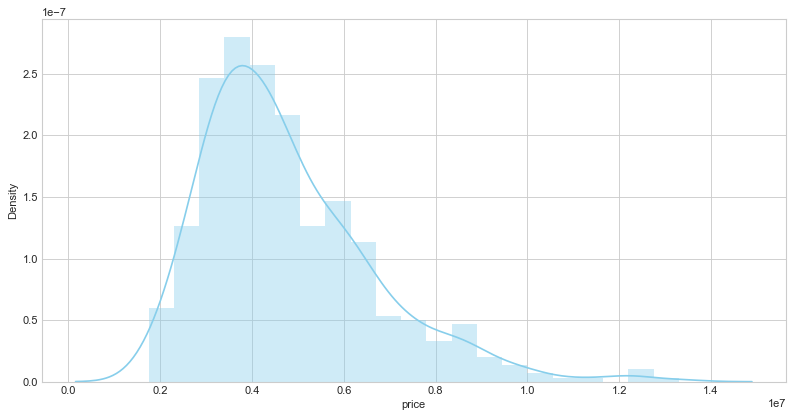

In [5]:
plt.figure(figsize = (12, 6), dpi = 80)
sns.distplot(data['price'], color = 'skyblue');

- Data Looks right skewed.

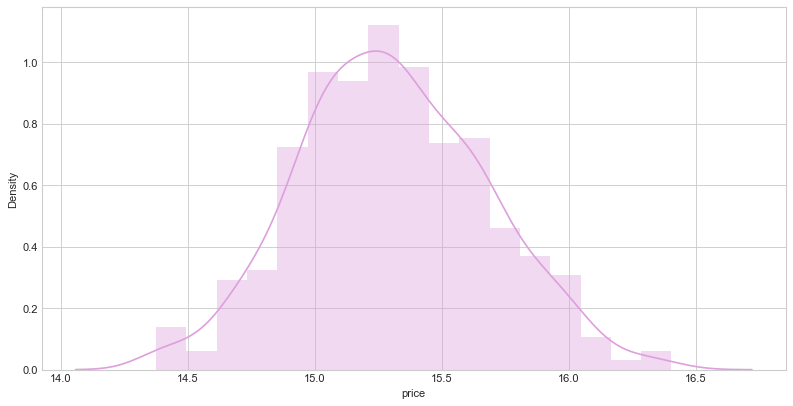

In [6]:
plt.figure(figsize = (12, 6), dpi = 80)
sns.distplot(np.log(data['price']), color= 'plum');

- Now it looks normally distributed.

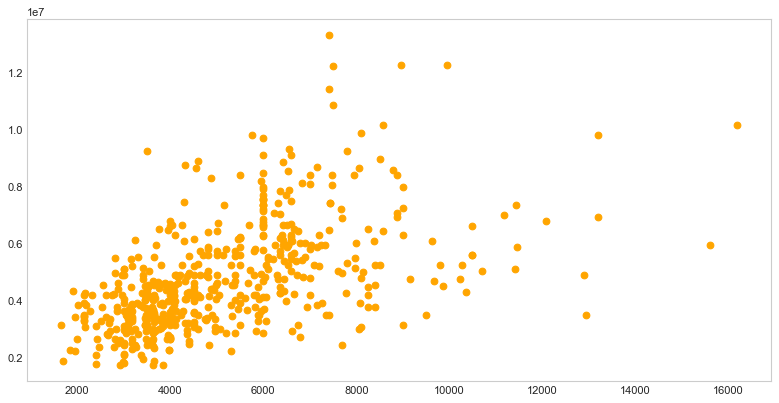

In [7]:
plt.figure(figsize = (12, 6), dpi = 80)
plt.scatter(x = data['area'], y = data['price'], color = 'orange')
plt.grid(False);

In [8]:
data['area'].max()

16200

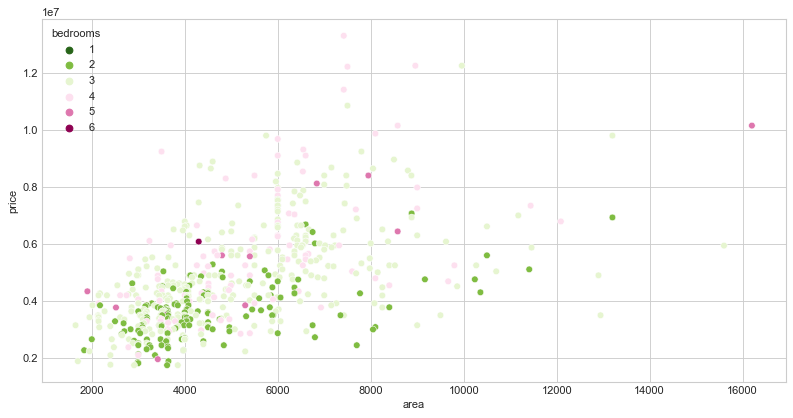

In [9]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (12, 6), dpi = 80)
sns.scatterplot(data['area'], data['price'], hue = data['bedrooms'], palette = 'PiYG_r');

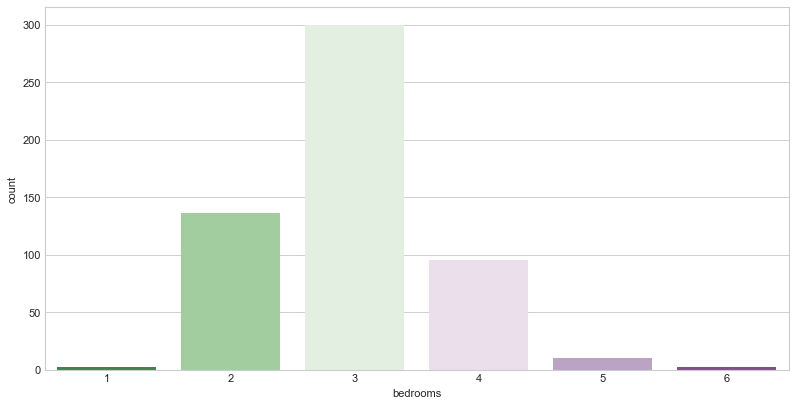

In [10]:
plt.figure(figsize = (12,6), dpi = 80)
sns.countplot(data['bedrooms'], palette = 'PRGn_r');

### Bedrooms vs Price

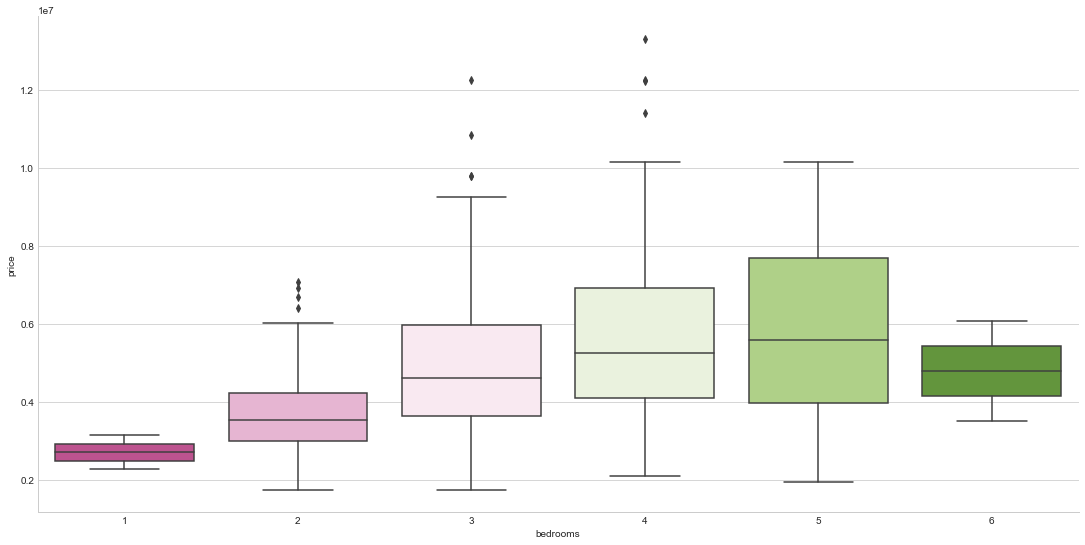

In [11]:
sns.catplot(x = 'bedrooms', y = 'price', data = data, kind = 'box', palette = 'PiYG', height = 7.5, aspect = 2);

### Bathrooms vs Price

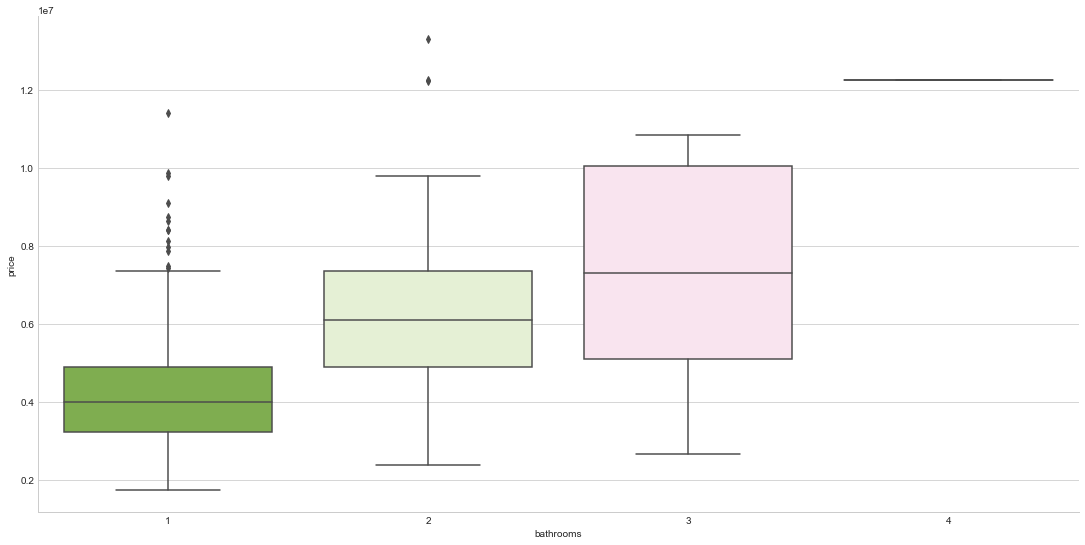

In [12]:
sns.catplot(x = 'bathrooms', y = 'price', data = data, kind = 'box', palette = 'PiYG_r', height = 7.5, aspect = 2);

## visulaizing your categorical variable

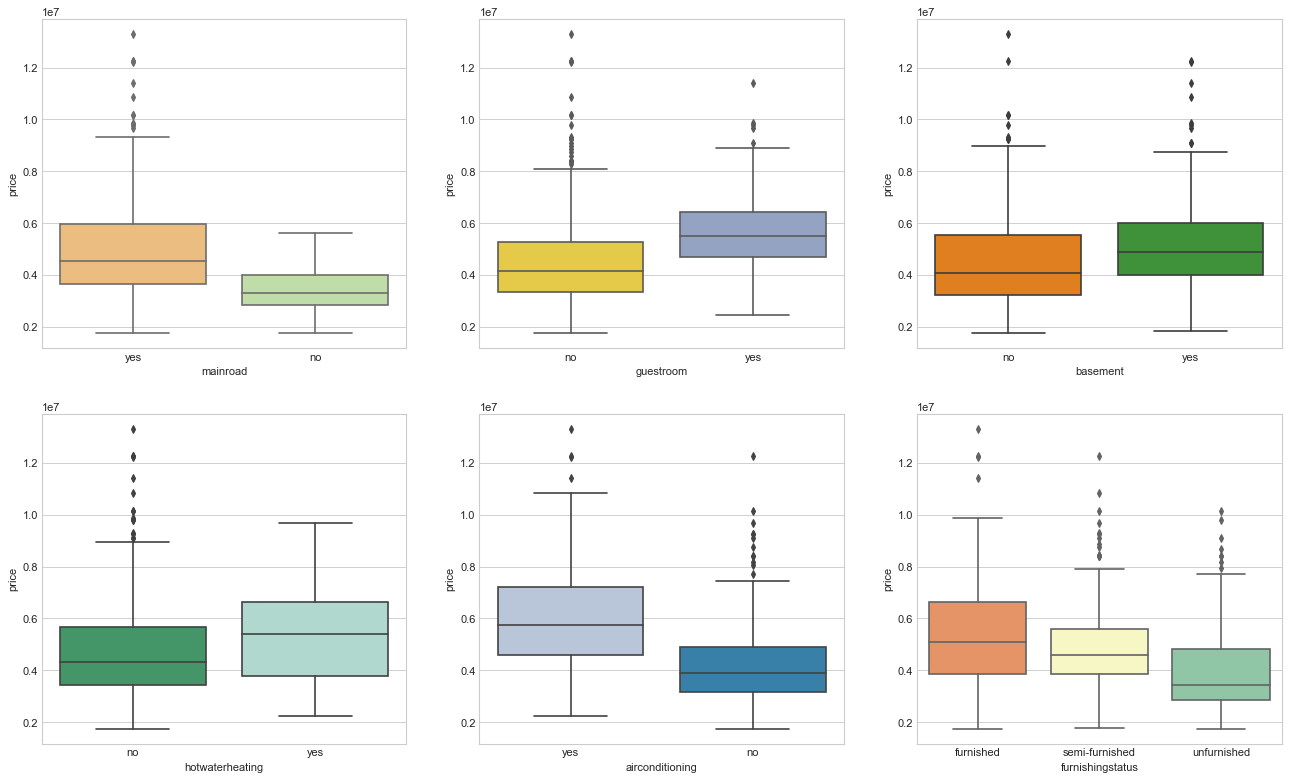

In [13]:
plt.figure(figsize=(20,12), dpi = 80)
plt.subplot(2,3,1)
sns.boxplot(x='mainroad', y='price', data=data, palette = 'Spectral')
plt.subplot(2,3,2)
sns.boxplot(x='guestroom', y='price', data=data, palette = 'Set2_r')
plt.subplot(2,3,3)
sns.boxplot(x='basement', y='price', data=data, palette = 'Paired_r')
plt.subplot(2,3,4)
sns.boxplot(x='hotwaterheating', y='price', data=data, palette = 'BuGn_r')
plt.subplot(2,3,5)
sns.boxplot(x='airconditioning', y='price', data=data, palette = 'PuBu')
plt.subplot(2,3,6)
sns.boxplot(x='furnishingstatus', y='price', data=data, palette = 'Spectral')
plt.show()

In [14]:
data.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [15]:
cat_cols = [cols for cols in data.columns if data[cols].nunique() < 5 and data[cols].dtype in ['object', 'bool']]
print(list(cat_cols))

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


## Encoding boolean values

In [16]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [17]:
def binarymap(data) :
    return data.map({'yes' : 1, 'no' : 0})

In [18]:
data[varlist] = data[varlist].apply(binarymap)
data[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


In [19]:
status = pd.get_dummies(data['furnishingstatus'], drop_first = True)
# ------------------------------------------------------------------
data = pd.concat([data, status], 1)
# ------------------------------------------------------------------
data.drop('furnishingstatus', 1, inplace = True)
# ------------------------------------------------------------------
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


## Splitting into train test

In [20]:
from sklearn.model_selection import train_test_split as tts
# -------------------------------------------------------------------
df_train, df_test = tts(data, test_size = .20, random_state = 42)

print(f'train data : {df_train.shape}')
print(f'test data : {df_test.shape}')

train data : (436, 14)
test data : (109, 14)


## Rescalling the features :

- Using MinMax scaler here.
- Selecting features to scale down.

In [21]:
scaling_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [22]:
from sklearn.preprocessing import MinMaxScaler
# -------------------------------------------------------------------
scaler = MinMaxScaler().fit(df_train[scaling_features])
df_train[scaling_features] = scaler.transform(df_train[scaling_features])

df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
46,0.550000,0.298969,0.4,0.333333,1.000000,1,0,0,0,1,0.333333,0,0,0
93,0.433333,0.381443,0.4,0.333333,0.000000,1,0,1,0,1,1.000000,0,1,0
335,0.206667,0.148866,0.2,0.000000,0.000000,1,0,1,0,1,0.666667,0,0,0
412,0.160000,0.065979,0.4,0.000000,0.333333,1,0,1,0,0,0.000000,1,0,1
471,0.120000,0.144330,0.4,0.000000,0.333333,1,0,0,0,0,0.000000,0,0,1


## Check Correlation :

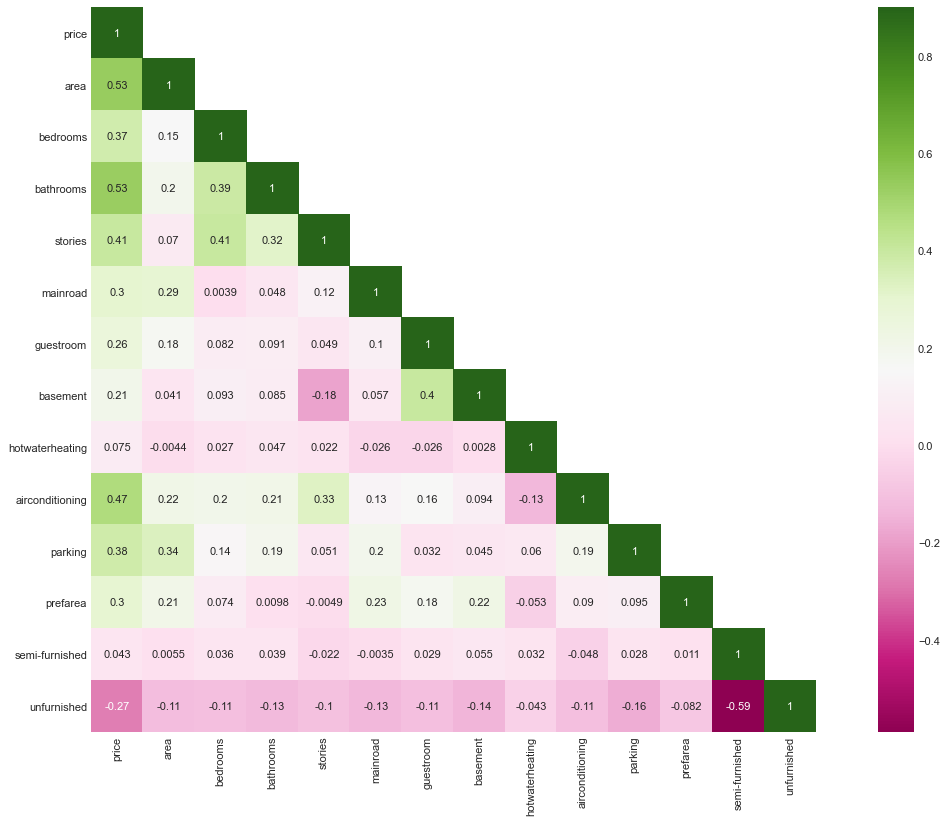

In [23]:
plt.figure(figsize = (20, 12), dpi = 80)
mask = np.array(df_train.corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(df_train.corr(), mask = mask, vmax = .9, square = True, annot = True, cmap = 'PiYG');

In [31]:
train_inputs = df_train.drop('price', 1)
train_targets = df_train['price']

print(f'train_inputs : {train_inputs.shape}')
print(f'train_targets : {train_targets.shape}')

train_inputs : (436, 13)
train_targets : (436,)


In [32]:
import statsmodels.api as sm

In [33]:
train_inputs_sm = sm.add_constant(train_inputs)
sm1 = sm.OLS(train_targets, train_inputs_sm).fit()
print(sm1.params)

const              0.045532
area               0.326985
bedrooms           0.036561
bathrooms          0.312699
stories            0.116422
mainroad           0.035040
guestroom          0.022058
basement           0.037167
hotwaterheating    0.065205
airconditioning    0.075374
parking            0.064241
prefarea           0.059990
semi-furnished    -0.012084
unfurnished       -0.039395
dtype: float64


In [34]:
print(sm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     70.90
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           2.16e-97
Time:                        19:40:07   Log-Likelihood:                 413.55
No. Observations:                 436   AIC:                            -799.1
Df Residuals:                     422   BIC:                            -742.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0455      0.021     

## Calculate VIF :

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
vif = pd.DataFrame()
vif['Features'] = train_inputs.columns
vif['Vif'] = [variance_inflation_factor(train_inputs.values, i) for i in range(train_inputs.shape[1])]
vif['Vif'] = round(vif['Vif'], 2)
vif = vif.sort_values('Vif', ascending = False)
vif

,Features,Vif
1,bedrooms,7.72
4,mainroad,5.94
0,area,4.51
3,stories,2.78
11,semi-furnished,2.27
6,basement,2.11
9,parking,2.00
12,unfurnished,1.87
8,airconditioning,1.83
2,bathrooms,1.67


We could have 
- High p-value , High VIF
- High - Low
  - High p , low VIF  - `remove these first`
  - Low p, High VIF   - `remove these after the ones above`
- Low p, Low VIF

In [38]:
# --------------- from statsmodels.api import OLS ------------------------

In [39]:
# Dropping 'semi-furnished' since it has high p-value and low vif.

x = train_inputs.drop('semi-furnished', 1)
train_inputs_sm = sm.add_constant(x)
sm2 = sm.OLS(train_targets, train_inputs_sm).fit()
print(sm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     76.70
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           4.11e-98
Time:                        19:52:08   Log-Likelihood:                 412.99
No. Observations:                 436   AIC:                            -800.0
Df Residuals:                     423   BIC:                            -747.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0362      0.019     

- There is 'bedrooms' which has high p-value.
- Removing this and again check the summary by fitting model again.

In [42]:
# Dropping the variable 'bedrooms'

x = x.drop('bedrooms', 1)
train_inputs_sm = sm.add_constant(x)
sm3 = sm.OLS(train_targets, train_inputs_sm).fit()
print(sm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     83.59
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           7.15e-99
Time:                        19:56:43   Log-Likelihood:                 412.49
No. Observations:                 436   AIC:                            -801.0
Df Residuals:                     424   BIC:                            -752.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0475      0.015     

In [44]:
# Calculate vif again :

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['Vif'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['Vif'] = round(vif['Vif'], 2)
vif = vif.sort_values('Vif', ascending = False)
vif

,Features,Vif
3,mainroad,4.91
0,area,4.24
2,stories,2.30
8,parking,1.98
5,basement,1.94
7,airconditioning,1.82
1,bathrooms,1.59
4,guestroom,1.53
9,prefarea,1.48
10,unfurnished,1.33
